In [1]:
#Obliczenia  i analiza  danych
import numpy as np
import pandas as pd

#wizualiacja 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette('icefire_r', 2)
import warnings

%matplotlib inline
#Przetwarzanie

from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
# Baza danych gównych do nauki modelu
train = pd.read_csv("train.csv") 
# Baza danych Titanica do sprawdzenia modelu
test = pd.read_csv("test.csv")

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_values_per_column = train.isnull().sum()
print(missing_values_per_column.to_string(index=True))

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
object_columns = train.select_dtypes(include='object').columns
numerical_columns = train.select_dtypes(exclude='object').columns
print(object_columns)
print(numerical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

In [5]:
object_values = train.loc[:, object_columns]
object_values.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Ordinal encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Enc_col = object_columns

categories = {}
for col in Enc_col:
    for df in [train, test]:
        df[col + '_Enc'] = enc.fit_transform(df[col].values.reshape(-1, 1))
    categories[col] = enc.categories_[0]  # Store categories for the current column

# Print the mapping
for col in Enc_col:
    print(f"Kolumna: {col}")
    for i, category in enumerate(categories[col]):
        print(f"  Wartość zakodowana: {i} -> Wartość początkowa: {category}")

Kolumna: MSZoning
  Wartość zakodowana: 0 -> Wartość początkowa: C (all)
  Wartość zakodowana: 1 -> Wartość początkowa: FV
  Wartość zakodowana: 2 -> Wartość początkowa: RH
  Wartość zakodowana: 3 -> Wartość początkowa: RL
  Wartość zakodowana: 4 -> Wartość początkowa: RM
  Wartość zakodowana: 5 -> Wartość początkowa: nan
Kolumna: Street
  Wartość zakodowana: 0 -> Wartość początkowa: Grvl
  Wartość zakodowana: 1 -> Wartość początkowa: Pave
Kolumna: Alley
  Wartość zakodowana: 0 -> Wartość początkowa: Grvl
  Wartość zakodowana: 1 -> Wartość początkowa: Pave
  Wartość zakodowana: 2 -> Wartość początkowa: nan
Kolumna: LotShape
  Wartość zakodowana: 0 -> Wartość początkowa: IR1
  Wartość zakodowana: 1 -> Wartość początkowa: IR2
  Wartość zakodowana: 2 -> Wartość początkowa: IR3
  Wartość zakodowana: 3 -> Wartość początkowa: Reg
Kolumna: LandContour
  Wartość zakodowana: 0 -> Wartość początkowa: Bnk
  Wartość zakodowana: 1 -> Wartość początkowa: HLS
  Wartość zakodowana: 2 -> Wartość począt

In [7]:
#### Usnięcie kolumn, które zostały zancodowane.
object_columns = train.select_dtypes(include='object').columns
for df in [train, test]:
     df.drop(columns=object_columns, inplace=True)

missing_values_per_column = train.isnull().sum()
print(missing_values_per_column.to_string(index=True))

Id                      0
MSSubClass              0
LotFrontage           259
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              8
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt            81
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
SalePrice               0
MSZoning_Enc

#### KNN Inputer

In [8]:
def fill_missing_values(df, column_to_exclude='SalePrice'):
    cols_to_impute = [col for col in df.columns if col != column_to_exclude and df[col].isna().any()]

    imputer = KNNImputer(n_neighbors=6)

    df_imputed = df[cols_to_impute].copy()  # Avoid modifying original DataFrame
    df_imputed = imputer.fit_transform(df_imputed)

    df[cols_to_impute] = df_imputed

    # Return the imputed DataFrame and original column order (excluding the excluded column)
    return df, [col for col in df.columns if col != column_to_exclude]

combined_df = pd.concat([train, test], ignore_index=True)

# Impute missing values in the combined DataFrame
combined_df_imputed, cols_without_excluded = fill_missing_values(combined_df)

# Split the imputed DataFrame back to train and test
train_imputed = combined_df_imputed.iloc[:len(train)]
test_imputed = combined_df_imputed.iloc[len(train):]

# Restore original column order for train and test
train = train_imputed[cols_without_excluded].assign(SalePrice=train['SalePrice']) 
test = test_imputed[cols_without_excluded]

#### Modele standaryzujące

In [9]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import Normalizer
# # # # Exclude 'Id' and 'SalePrice' from numerical columns (more explicit)
# numerical_columns_exclud = [ col for col in numerical_columns if col not in ['Id', 'SalePrice']]

# # Tworzenie obiektu StandardScaler
# scaler = Normalizer()
# # Dopasowanie i transformacja danych treningowych
# scaler.fit(train[numerical_columns_exclud])
# train_scaled = scaler.transform(train[numerical_columns_exclud])
# # Transformacja danych testowych
# test_scaled = scaler.transform(test[numerical_columns_exclud])
# # Dodanie przetworzonych kolumn do data frame
# for df in [train, test]:
#   df[numerical_columns_exclud] = scaler.transform(df[numerical_columns_exclud])
#________________________________________________________________________________



In [10]:
print(len(train.columns))


81


Średni błąd MSE z walidacji krzyżowej: 1377257712.3507745


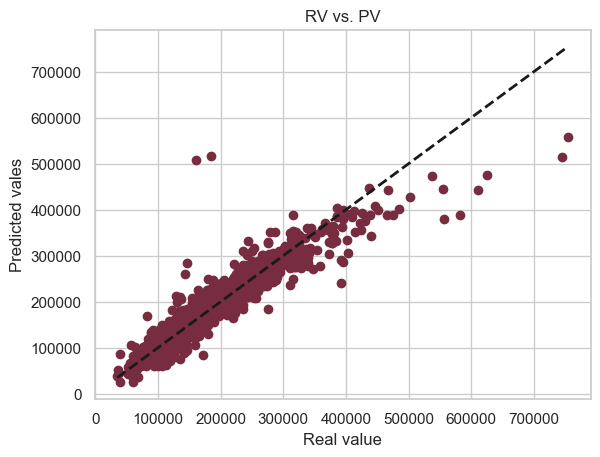

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

features = [col for col in train.columns if col not in ['Id', 'SalePrice']]

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42) 
mse_scores = []

for train_index, val_index in kf.split(train[features]):
    X_train, X_val = train[features].iloc[train_index], train[features].iloc[val_index]
    y_train, y_val = train['SalePrice'].iloc[train_index], train['SalePrice'].iloc[val_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred) 
    mse_scores.append(mse)

model.fit(train[features], train['SalePrice'])

y_pred = model.predict(train[features])

y_train = train['SalePrice'] 

average_mse = sum(mse_scores) / len(mse_scores)
print(f"Średni błąd MSE z walidacji krzyżowej: {average_mse}")

plt.scatter(y_train, y_pred)

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

plt.xlabel('Real value')
plt.ylabel('Predicted vales')
plt.title('RV vs. PV')

plt.show()

#### Dimensity reduction

In [12]:
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.decomposition import PCA
import umap
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def split_combined_dataframe(combined_df, train_size):
    train_df = combined_df.iloc[:train_size, :]
    test_df = combined_df.iloc[train_size:, :]
    return train_df, test_df

def get_desired_columns(train_df, test_df):
    desired_columns = []
    for col in train_df.columns:
        if col in test_df.columns and col not in ['Id', 'SalePrice']: 
            desired_columns.append(col)
    return desired_columns

desired_columns = get_desired_columns(train, test)

# 1. Baseline MSE dla regresji liniowej 
X_train = train[desired_columns]
y_train = train['SalePrice']

linear_model_orig = LinearRegression()
linear_model_orig.fit(X_train, y_train)
y_pred_orig = linear_model_orig.predict(X_train)  
mse_baseline = mean_squared_error(y_train, y_pred_orig)

print(f"Baseline MSE (regresja liniowa): {mse_baseline}")

# 2. Ocena QDA na oryginalnych danych
y_train_classes = pd.qcut(y_train, 3, labels=["low", "medium", "high"]) 

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train_classes)
y_pred_classes = qda.predict(X_train)
accuracy_baseline = accuracy_score(y_train_classes, y_pred_classes)

print(f"Baseline accuracy (QDA): {accuracy_baseline}")

# 4. XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_train)
mse_xgb = mean_squared_error(y_train, y_pred_xgb)

print(f"MSE (XGBoost): {mse_xgb}")

def umap_quality_metric(model, data, n_neighbors=5):
    """Oblicza średnią odległość do n najbliższych sąsiadów w oryginalnej i zredukowanej przestrzeni."""

    # Obliczanie odległości w oryginalnej przestrzeni
    nn_orig = NearestNeighbors(n_neighbors=n_neighbors).fit(data)
    orig_distances, _ = nn_orig.kneighbors(data)
    mean_orig_dist = orig_distances.mean()

    # Obliczanie odległości w zredukowanej przestrzeni
    reduced_data = model.embedding_
    nn_reduced = NearestNeighbors(n_neighbors=n_neighbors).fit(reduced_data)
    reduced_distances, _ = nn_reduced.kneighbors(reduced_data)
    mean_reduced_dist = reduced_distances.mean()

    # Zwracamy różnicę między średnimi odległościami (im mniejsza, tym lepiej)
    return abs(mean_orig_dist - mean_reduced_dist)

def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['TSNE', 'PCA', 'UMAP', 'Isomap', 'LLE'])

    if model_type == 'TSNE':
        n_components = trial.suggest_int('n_components', 2, 80)
        perplexity = trial.suggest_int('perplexity', 5, 200)
        model = TSNE(n_components=n_components, perplexity=perplexity, 
                        init='pca', method='exact', max_iter=2000, n_jobs=-1, random_state=42)

    elif model_type == 'PCA':
        n_components = trial.suggest_int('n_components', 2, 80)
        model = PCA(n_components=n_components)

    elif model_type == 'UMAP':
        n_components = trial.suggest_int('n_components', 2, 80)
        n_neighbors = trial.suggest_int('n_neighbors', 2, 240)
        min_dist = trial.suggest_float('min_dist', 0.0, 1.0)
        model = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)

    elif model_type == 'Isomap':
        n_components = trial.suggest_int('n_components', 2, 80)
        n_neighbors = trial.suggest_int('n_neighbors', 2, 240)
        model = Isomap(n_components=n_components, n_neighbors=n_neighbors)

    elif model_type == 'LLE':
        n_components = trial.suggest_int('n_components', 2, 80)
        n_neighbors = trial.suggest_int('n_neighbors', 2, 240)
        model = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)

    # 3. Redukcja wymiarów TYLKO na zbiorze treningowym
    X_train_reduced = model.fit_transform(X_train)

    # Dzielimy wartości 'SalePrice' na 3 klasy (niskie, średnie, wysokie)
    y_train_classes = pd.qcut(y_train, 3, labels=["low", "medium", "high"])

    # Trenowanie QDA na danych zredukowanych
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_reduced, y_train_classes)

    # Predykcja na danych treningowych (zredukowanych)
    y_pred_classes = qda.predict(X_train_reduced)

    # Obliczamy dokładność klasyfikacji
    accuracy = accuracy_score(y_train_classes, y_pred_classes)

    # Zwracamy dokładność jako metrykę optymalizacji (im wyższa, tym lepiej)
    return accuracy

# Ustawiamy kierunek optymalizacji na maksymalizację różnicy MSE
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200) 

best_params = study.best_params
print(f"Best parameters: {best_params}")

# Użyj najlepszych parametrów do stworzenia ostatecznego modelu
best_model_type = best_params['model_type']
if best_model_type == 'TSNE':
    best_model = TSNE(n_components=best_params['n_components'], 
                        perplexity=best_params['perplexity'],
                        init='pca', method='exact', max_iter=5000, n_jobs=-1, random_state=42)
elif best_model_type == 'PCA':
    best_model = PCA(n_components=best_params['n_components'])
elif best_model_type == 'UMAP':
    best_model = umap.UMAP(n_components=best_params['n_components'], 
                            n_neighbors=best_params['n_neighbors'], 
                            min_dist=best_params['min_dist'], random_state=42)
elif best_model_type == 'Isomap':
    best_model = Isomap(n_components=best_params['n_components'], 
                        n_neighbors=best_params['n_neighbors'])
elif best_model_type == 'LLE':
    best_model = LocallyLinearEmbedding(n_components=best_params['n_components'], 
                                        n_neighbors=best_params['n_neighbors'])

# Dopasuj najlepszy model do całego zbioru treningowego TYLKO RAZ
best_model.fit(train[desired_columns])
X_train_reduced = best_model.transform(train[desired_columns])
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, train['SalePrice'])
y_pred_reduced_final = linear_model_reduced.predict(X_train_reduced)
mse_reduced_final = mean_squared_error(y_train, y_pred_reduced_final)
print(f"MSE with dimensionality reduction: {mse_reduced_final}")

# Scatter plot of actual vs predicted values (for the reduced data)
plt.scatter(train['SalePrice'], y_pred_reduced_final)
plt.plot([train['SalePrice'].min(), train['SalePrice'].max()], [train['SalePrice'].min(), train['SalePrice'].max()], 'k--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predicted vales')
plt.title('RV vs. PV (with dimensionality reduction)')
plt.show()



c:\Users\domin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[I 2024-08-27 16:46:21,796] A new study created in memory with name: no-name-e770ff3d-0019-492f-9931-39ef9b6685f1


Baseline MSE (regresja liniowa): 874906777.0628657
Baseline accuracy (QDA): 0.8506849315068493
MSE (XGBoost): 1831479.5956070155


[I 2024-08-27 16:46:24,712] Trial 0 finished with value: 0.7863013698630137 and parameters: {'model_type': 'Isomap', 'n_components': 54, 'n_neighbors': 135}. Best is trial 0 with value: 0.7863013698630137.
[I 2024-08-27 16:46:27,992] Trial 1 finished with value: 0.6945205479452055 and parameters: {'model_type': 'Isomap', 'n_components': 20, 'n_neighbors': 168}. Best is trial 0 with value: 0.7863013698630137.
[I 2024-08-27 16:46:28,619] Trial 2 finished with value: 0.7273972602739726 and parameters: {'model_type': 'LLE', 'n_components': 54, 'n_neighbors': 148}. Best is trial 0 with value: 0.7863013698630137.
c:\Users\domin\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[I 2024-08-27 16:49:32,887] Trial 3 finished with value: 0.6493150684931507 and parameters: {'model_type': 'TSNE', 'n_components': 43, 'perplexity': 51}. Best is trial 0 with value: 0.7863013698630137.
[I 2024-08-27 16:49:33

ValueError: n_components=80 must be between 0 and min(n_samples, n_features)=79 with svd_solver='covariance_eigh'

## Wizualizacja

In [ ]:
# correlation_matrix = train_reduced_df.corr()
# plt.figure(figsize=(32, 24))
# sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)
# plt.show()

In [ ]:
best_params = {'model_type': 'LLE', 'n_components': 19, 'n_neighbors': 36}


# Użyj najlepszych parametrów do stworzenia ostatecznego modelu
best_model_type = best_params['model_type']
if best_model_type == 'TSNE':
    best_model = TSNE(n_components=best_params['n_components'], 
                      perplexity=best_params['perplexity'],
                      init='pca', method='exact', max_iter=5000, n_jobs=-1, random_state=42)
elif best_model_type == 'PCA':
    best_model = PCA(n_components=best_params['n_components'])
elif best_model_type == 'UMAP':
    best_model = umap.UMAP(n_components=best_params['n_components'], 
                           n_neighbors=best_params['n_neighbors'], 
                           min_dist=best_params['min_dist'], random_state=42)
elif best_model_type == 'Isomap':
    best_model = Isomap(n_components=best_params['n_components'], 
                        n_neighbors=best_params['n_neighbors'])
elif best_model_type == 'LLE':
    best_model = LocallyLinearEmbedding(n_components=best_params['n_components'], 
                                        n_neighbors=best_params['n_neighbors'])

# Fit the best model to the entire training data ONCE
X_train_reduced = best_model.fit_transform(train[desired_columns])

# Walidacja krzyżowa na zredukowanych danych treningowych
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_reduced = []

for train_index, val_index in kf.split(X_train_reduced):
    X_train_fold, X_val_fold = X_train_reduced[train_index], X_train_reduced[val_index]
    y_train_fold, y_val_fold = train['SalePrice'].iloc[train_index], train['SalePrice'].iloc[val_index]

    # Train the linear model on the reduced data
    linear_model_reduced = LinearRegression()
    linear_model_reduced.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold (reduced data)
    y_pred_reduced = linear_model_reduced.predict(X_val_fold)

    # Calculate MSE and append to the list
    mse_reduced = mean_squared_error(y_val_fold, y_pred_reduced)
    mse_scores_reduced.append(mse_reduced)

# Retrain the model on the entire reduced training set (using the same X_train_reduced)
linear_model_reduced.fit(X_train_reduced, train['SalePrice'])

# Predict on the entire reduced training set
y_pred_reduced = linear_model_reduced.predict(X_train_reduced)

# Display the average MSE for the reduced data
average_mse_reduced = sum(mse_scores_reduced) / len(mse_scores_reduced)
print(f"Average MSE with dimensionality reduction: {average_mse_reduced}")

# Scatter plot of actual vs predicted values (for the reduced data)
plt.scatter(train['SalePrice'], y_pred_reduced)
plt.plot([train['SalePrice'].min(), train['SalePrice'].max()], [train['SalePrice'].min(), train['SalePrice'].max()], 'k--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predicted vales')
plt.title('RV vs. PV (with dimensionality reduction)')
plt.show()